<a href="https://colab.research.google.com/github/iranamira/metnum_Pertemuan10_Namira-Nurfaliani/blob/main/Polinom_Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Namira Nurfaliani-21120122140135

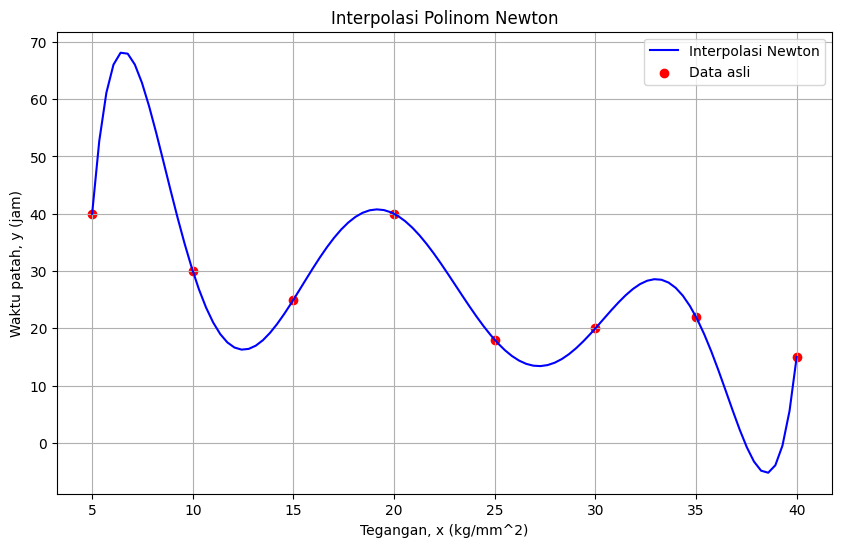

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data yang diberikan
x = np.array([5, 10, 15, 20, 25, 30, 35, 40])
y = np.array([40, 30, 25, 40, 18, 20, 22, 15])

def newton_divided_diff(x, y):
    """
    Fungsi untuk menghitung tabel selisih terbagi Newton.

    Args:
    x (numpy array): array dari nilai x yang diketahui
    y (numpy array): array dari nilai y yang diketahui

    Returns:
    numpy array: tabel selisih terbagi Newton
    """
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    return coef

def newton_interpolation(x_data, y_data, x):
    """
    Fungsi untuk menghitung nilai interpolasi Newton pada titik x.

    Args:
    x_data (numpy array): array dari nilai x yang diketahui
    y_data (numpy array): array dari nilai y yang diketahui
    x (float): nilai x yang ingin diinterpolasi

    Returns:
    float: nilai y hasil interpolasi
    """
    coef = newton_divided_diff(x_data, y_data)
    n = len(x_data)
    y_interp = coef[0,0]
    for i in range(1, n):
        term = coef[0,i]
        for j in range(i):
            term *= (x - x_data[j])
        y_interp += term
    return y_interp

# Testing interpolasi pada beberapa titik
test_points = np.linspace(5, 40, 100)
interpolated_values = [newton_interpolation(x, y, point) for point in test_points]

# Plotting hasil interpolasi
plt.figure(figsize=(10, 6))
plt.plot(test_points, interpolated_values, label='Interpolasi Newton', color='blue')
plt.scatter(x, y, color='red', label='Data asli')
plt.xlabel('Tegangan, x (kg/mm^2)')
plt.ylabel('Waktu patah, y (jam)')
plt.title('Interpolasi Polinom Newton')
plt.legend()
plt.grid(True)
plt.show()
